In [45]:
import numpy as np
import pandas as pd
import pprint
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.datasets import load_digits
from IPython.display import display, HTML
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
import math, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
#import tensorflow
#import tensorflow.keras as keras
#from tensorflow.keras.layers import Dense, Conv2D, Reshape, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization, ZeroPadding2D
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer, StandardScaler
#from keras.regularizers import l2
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [46]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [47]:
np.random.seed(0)

In [48]:
def load_data(clean=False):
    data_directory = "data/"
    filename = "diabetes.csv"
    df = pd.read_csv(data_directory + filename)
    if clean:
        df = df[df['SkinThickness'] > 0]
        df = df[df['Insulin'] > 0]
    #plt.show()
    cols = list(df.columns.values)
    cols.remove('Outcome')
    X = (df[cols]).values
    y = df['Outcome'].values
    if clean:
        X = StandardScaler().fit_transform(X)
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = scaler.transform(X)
    
    #plt.savefig("./output/label_count_mnist.png")
    return(X, y)

def split_data(X, y, data_size=1.0, train_size=0.8, strat=False):
    if strat:
        sss = StratifiedShuffleSplit(n_splits=1, random_state=0, train_size=train_size, test_size=train_size/4)
        for train_index, test_index in sss.split(X, y):
            print("hm")
            X_train = X[train_index]
            X_test = X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=train_size/4)
    return(X_train, y_train, X_test, y_test)


In [49]:
X, y = load_data(clean=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train, X_test, y_test = split_data(X_train, y_train, train_size=0.8)
#X_train = StandardScaler().fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
#print(X_holdout_test.shape)

(315, 8)
(79, 8)


In [51]:



def plot_hyperparam_test(test_accs, train_accs, n_range, dataset, model_name, param_name, hist=False):

    plt.plot(n_range, train_accs, label = "train acc")
    plt.plot(n_range, test_accs, label = "test acc")
    plt.legend()

    plt.xlabel(param_name)
    plt.ylabel("test accuracy")
    title = "" + model_name + " score for " + param_name
    plt.title(title)
    plt.show()
    plt.savefig("./output/" + dataset + "-" + model_name + "-" + param_name + ".png")


def k_means_elbow_viz(X, k_range=(2, 15)):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=k_range)
    visualizer.fit(X_train)
    visualizer.show()

def k_means_silhouette(X,):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()


# K means

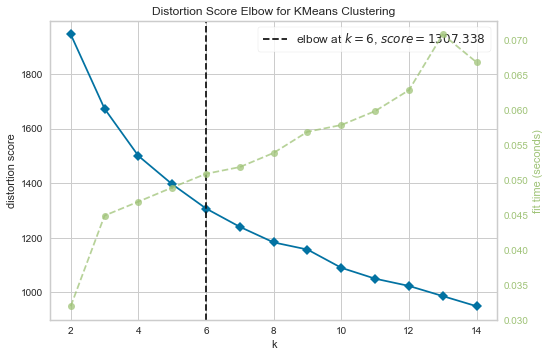

In [52]:
#wcss = []
#for i in range(1, 15):
##    kmeans = KMeans(n_clusters=i, random_state=13)
#    kmeans.fit(X_train)
#    wcss.append(kmeans.inertia_) #sum of squared distances of samples to cluster center

#plt.plot(range(1,15),wcss)
#plt.title('The Elbow Method Graph')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()


k_means_elbow_viz(X, k_range=(2, 15))

For n_clusters = 2 The average silhouette_score is : 0.23883272777104117
For n_clusters = 3 The average silhouette_score is : 0.20905435699056404
For n_clusters = 4 The average silhouette_score is : 0.19962716023275268
For n_clusters = 5 The average silhouette_score is : 0.1497923664143111
For n_clusters = 6 The average silhouette_score is : 0.15530819202230522
For n_clusters = 7 The average silhouette_score is : 0.15155463158042745
For n_clusters = 8 The average silhouette_score is : 0.14588480694058575
For n_clusters = 9 The average silhouette_score is : 0.13567880886402975
For n_clusters = 10 The average silhouette_score is : 0.12813018169925186


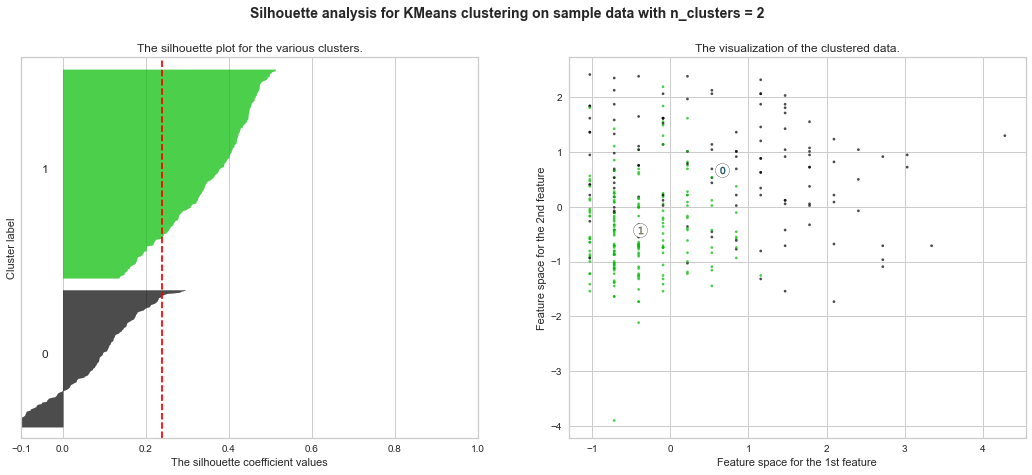

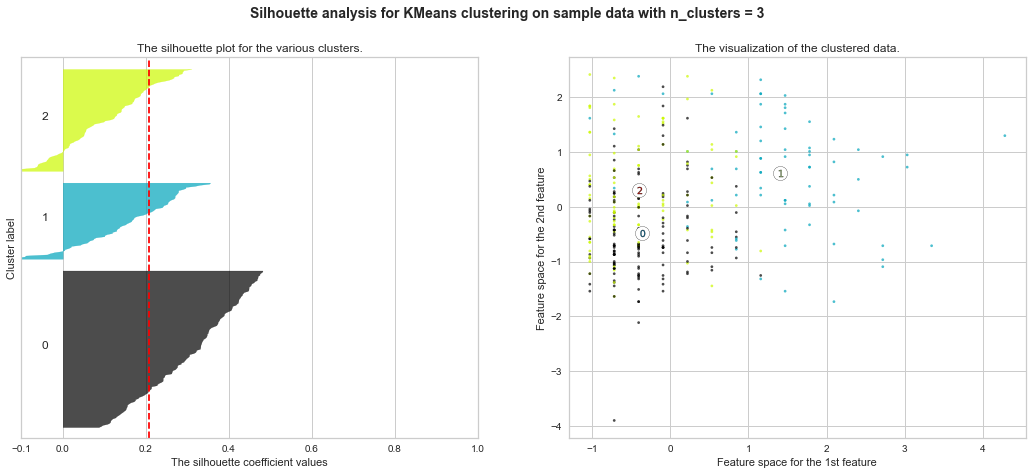

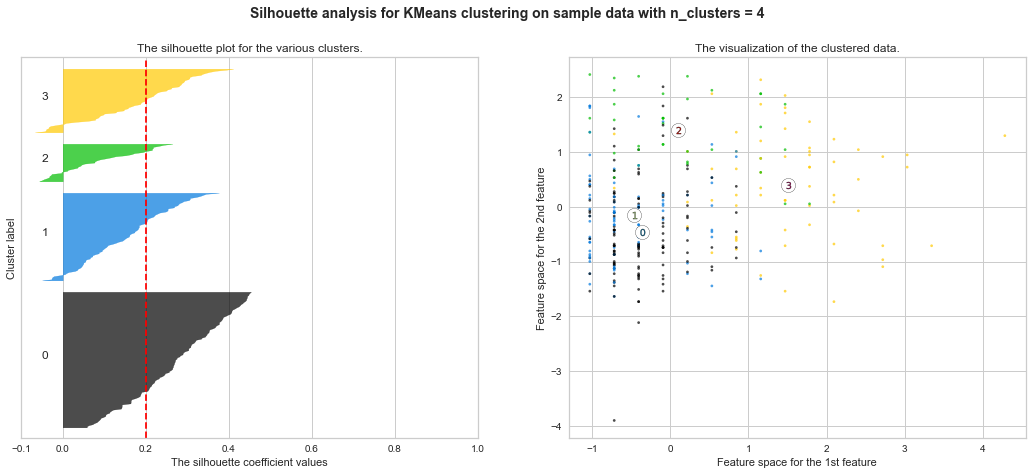

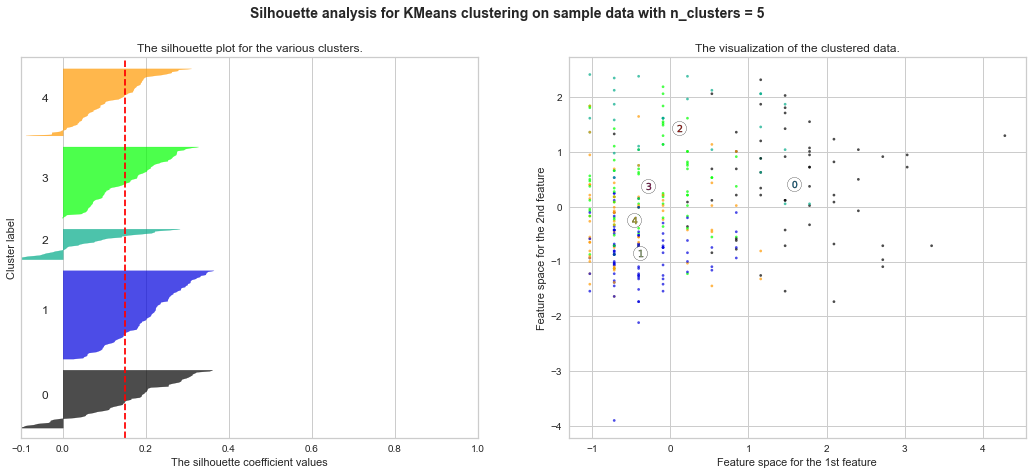

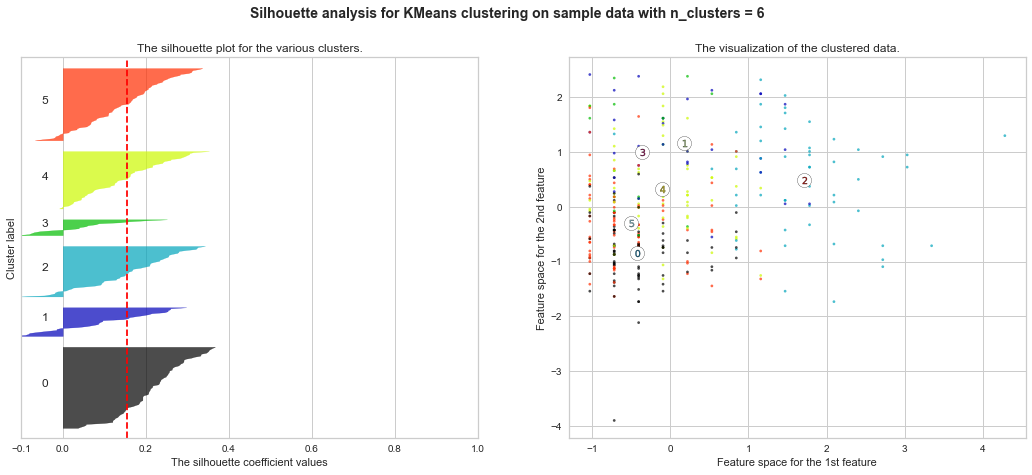

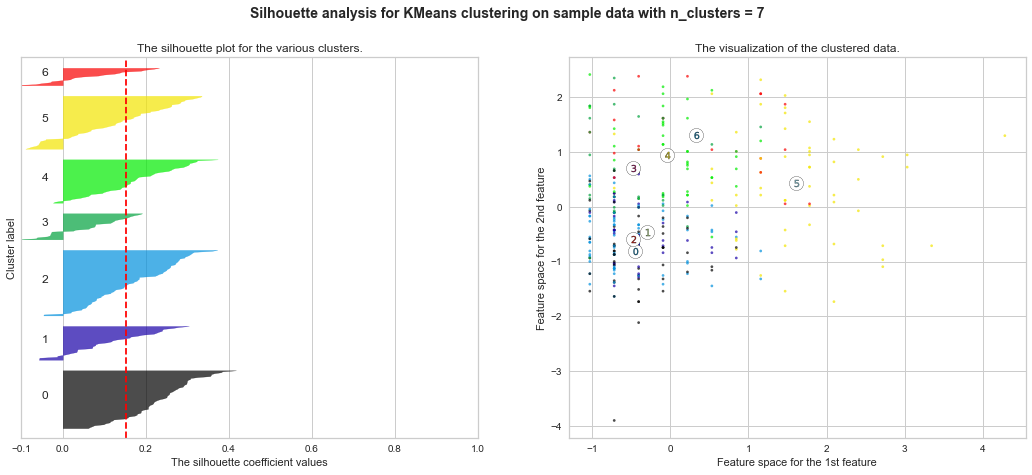

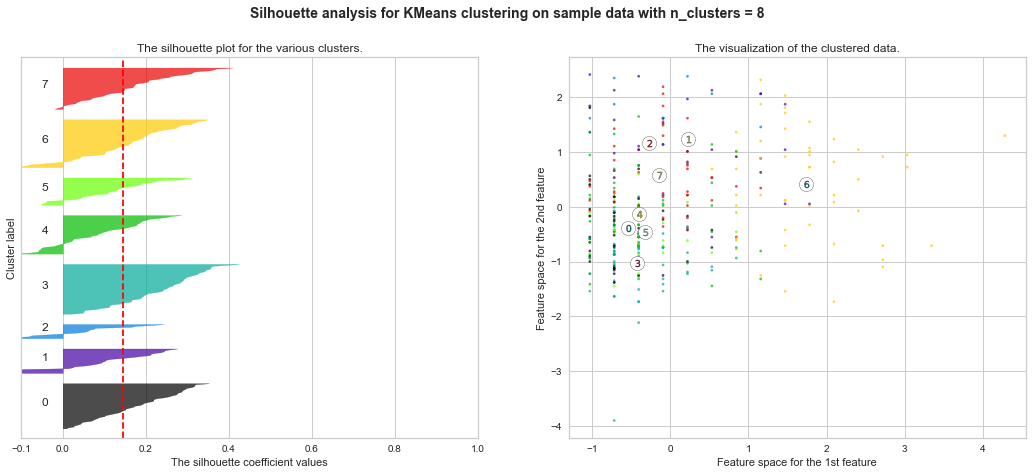

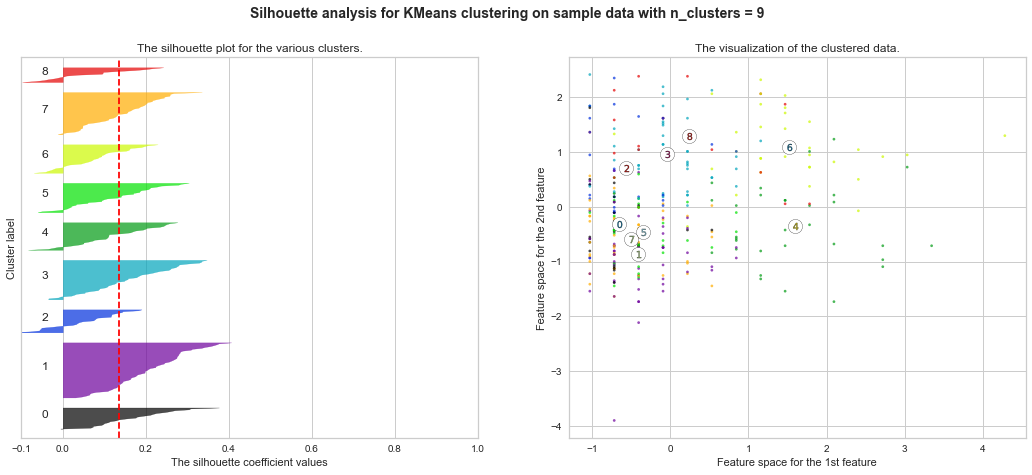

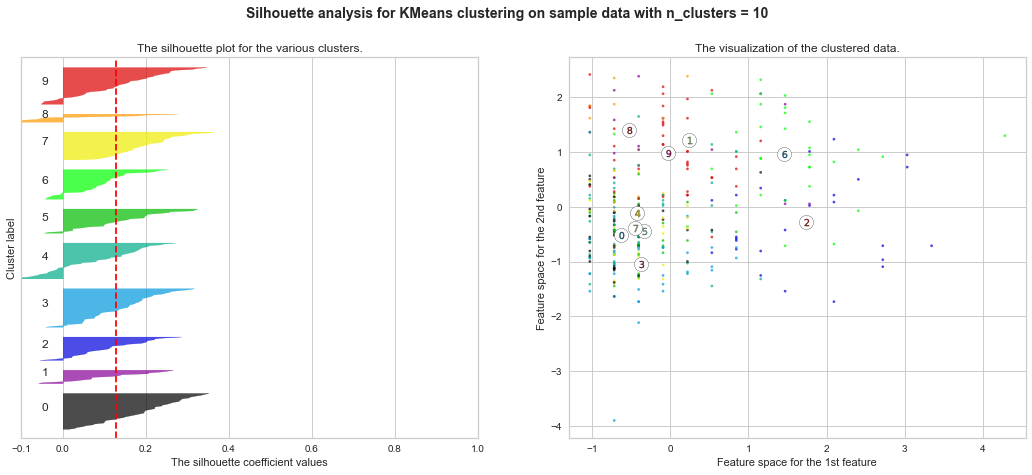

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Expectation Maximization

In [54]:
from sklearn.mixture import GaussianMixture as GMM

In [55]:
range_n_clusters = [1, 2, 3, 4, 5, 6]
aics = []
bics = []
scores = []
for i in range_n_clusters:
    gmm = GMM(random_state=13, n_components=i)
    gmm.fit(X_train)
    aics.append(gmm.aic(X_train))
    bics.append(gmm.bic(X_train))
    scores.append(gmm.score(X_train, y_train))
    
    

No handles with labels found to put in legend.


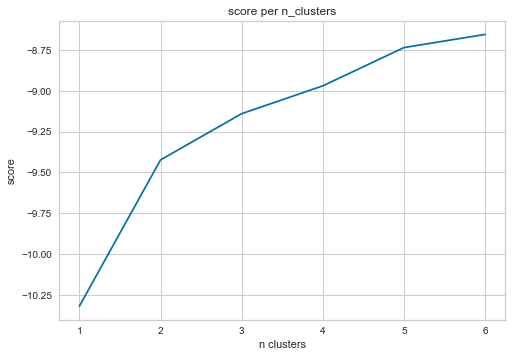

In [56]:
plt.plot(range_n_clusters, scores)
plt.xlabel ("n clusters")
plt.ylabel ("score")
plt.legend()
plt.title ("score per n_clusters")
plt.show()

No handles with labels found to put in legend.


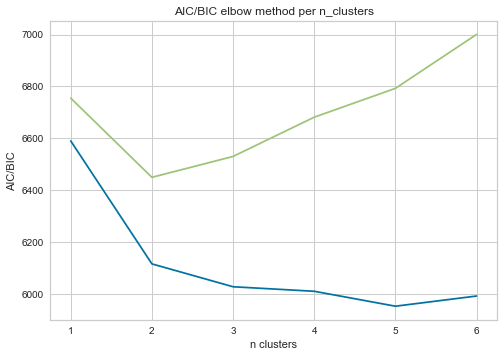

In [57]:
plt.plot(range_n_clusters, aics)
plt.plot(range_n_clusters, bics)
plt.xlabel ("n clusters")
plt.ylabel ("AIC/BIC")
plt.legend()
plt.title ("AIC/BIC elbow method per n_clusters")
plt.show()

# Data Analysis

c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: c

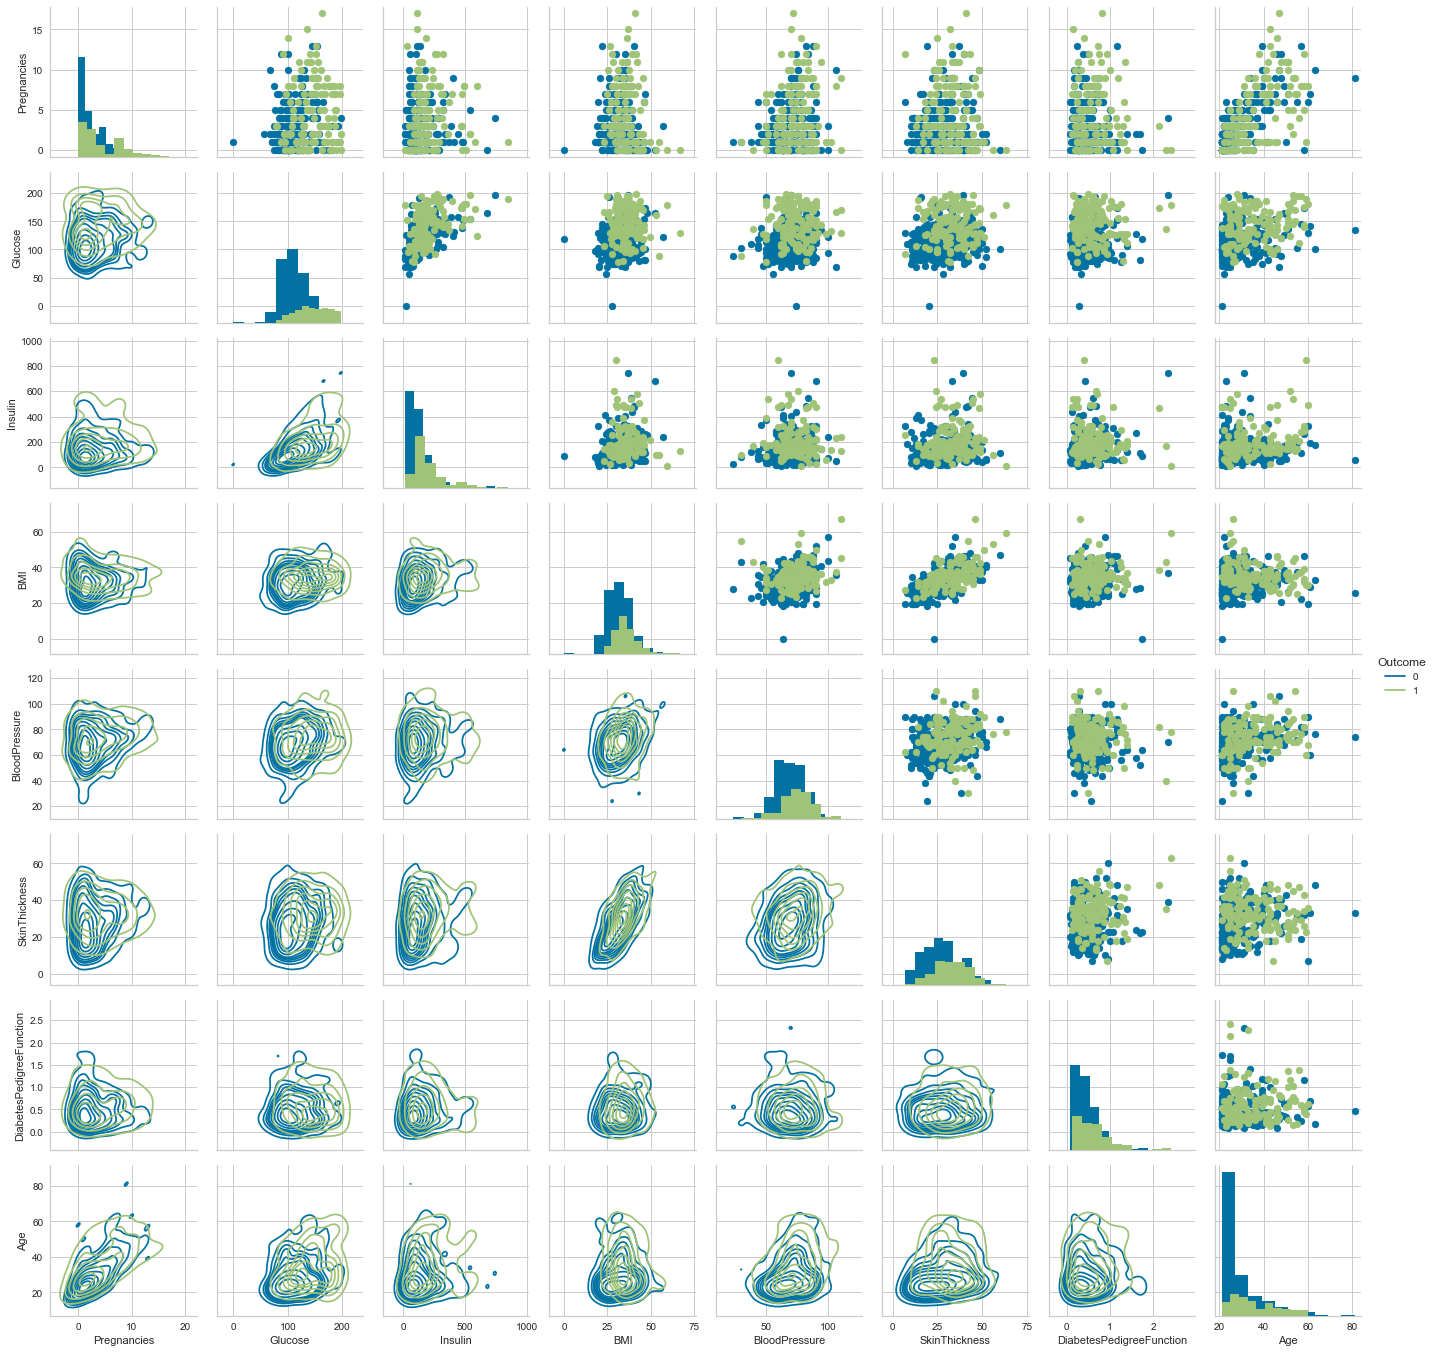

In [60]:
data = pd.read_csv('data/diabetes.csv')
data = data[data['SkinThickness'] > 0]
data = data[data['Insulin'] > 0]
#dont scale data becasue we're just looking at it here
g = sns.PairGrid(data, vars=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

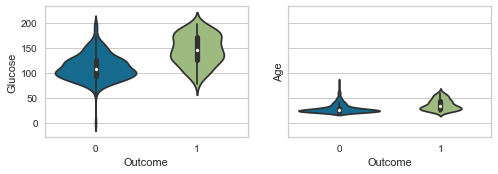

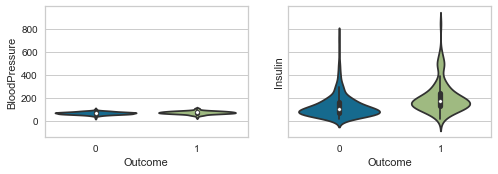

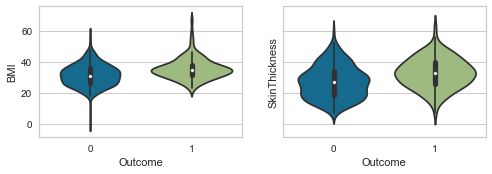

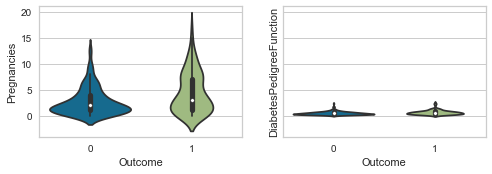

In [61]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = data.Outcome, y=data[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

In [62]:
#data = data[data.SkinThickness!=data.SkinThickness.max()]

In [63]:
#def replace_zero(df, field, target):
#    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
#    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
#    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
#for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
#    replace_zero(data, col, 'Outcome')    

In [64]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
#X = data.iloc[:,:-1]
#y = data.iloc[:, -1]

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=100)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.size)
#print(y_test.size)

In [66]:
# Data Analysis

In [67]:
data = pd.read_csv('data/diabetes.csv')


In [68]:
print(data['Outcome'])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


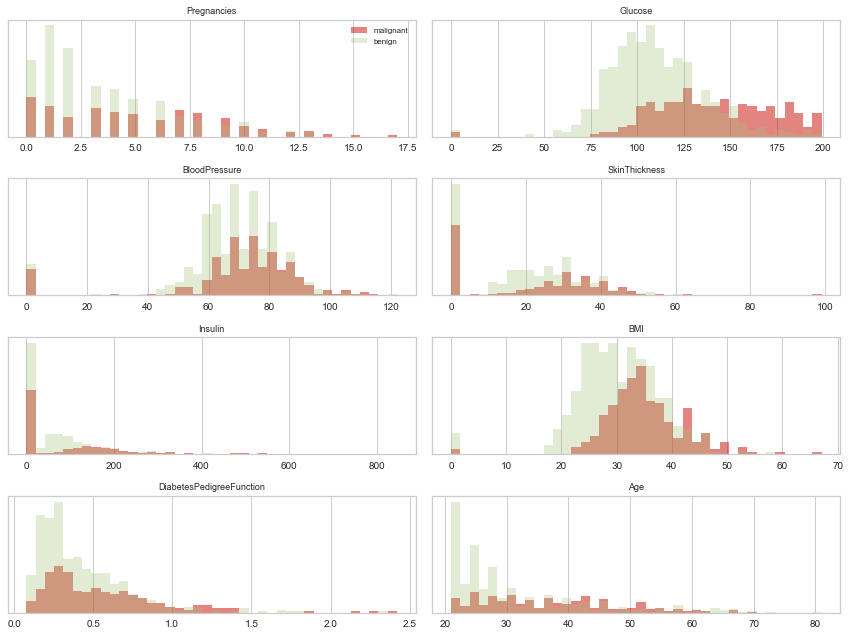

In [69]:
fig,axes =plt.subplots(4,2, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=data[data['Outcome']==1] # define malignant
benign=data[data['Outcome']==0] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(8):
    _,bins=np.histogram(data.iloc[:,i],bins=40)
    ax[i].hist(malignant.iloc[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(benign.iloc[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
    ax[i].set_title(data.columns[i],fontsize=9)
    ax[i].axes.get_xaxis()#.set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

In [70]:
data = data[data['SkinThickness'] > 0]
data = data[data['Insulin'] > 0]

In [71]:
print(data.shape)

(394, 9)


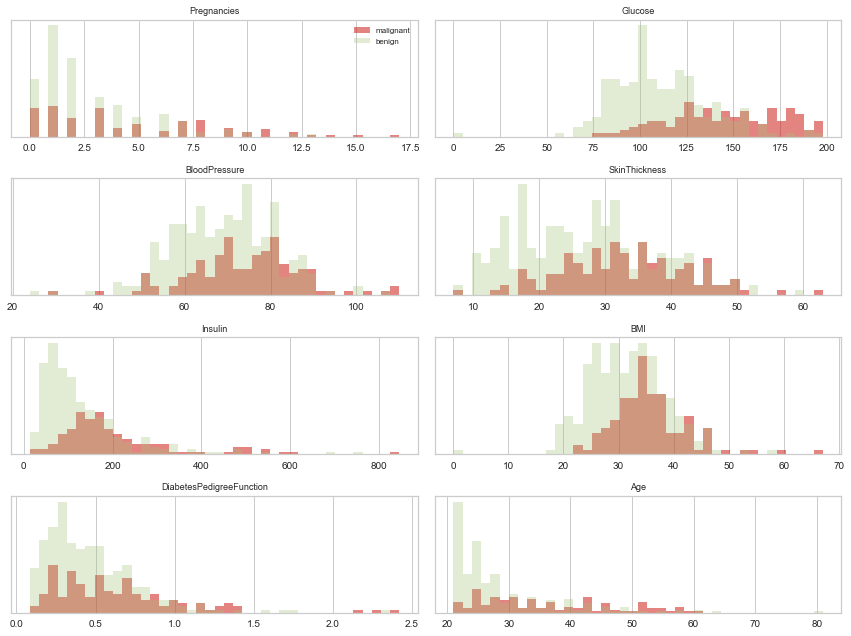

In [72]:
fig,axes =plt.subplots(4,2, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=data[data['Outcome']==1] # define malignant
benign=data[data['Outcome']==0] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(8):
    _,bins=np.histogram(data.iloc[:,i],bins=40)
    ax[i].hist(malignant.iloc[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(benign.iloc[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
    ax[i].set_title(data.columns[i],fontsize=9)
    ax[i].axes.get_xaxis()#.set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

# PCA

In [78]:
def build_pc_col_names(num):
    col_vals = []
    for i in range(1, num+1):
        col_vals.append(i)
    return col_vals

def compare_comp_vals_PCA(vals_range, X, y):
    result_dfs = []
    n_comp_vals = vals_range
    for comp_val in n_comp_vals:
        print("uh")
        pca = PCA(n_components=comp_val)
        col_vals = build_pc_col_names(comp_val)
        components = pca.fit_transform(X)

        pdf = pd.DataFrame(data = components
                     , columns = col_vals)
        pdy = pd.DataFrame(data=y, columns=["labels"])
        finalDf = pd.concat([pdf, pdy], axis = 1)
        result_dfs.append(finalDf)
        
        variance_ratio = pd.DataFrame({'var':pca.explained_variance_ratio_,
                     'PC':col_vals})
        sns.barplot(x='PC',y="var", data=variance_ratio, color="c");
        plt.show()
        plt.clf()
    return result_dfs

def pca_comparison(X, n_components):
    pca = PCA(n_components=n_components)
    col_vals = build_pc_col_names(n_components)
    components = pca.fit_transform(X)

    pdf = pd.DataFrame(data = components
                 , columns = col_vals)
    pdy = pd.DataFrame(data=y, columns=["labels"])
    finalDf = pd.concat([pdf, pdy], axis = 1)
    variance_ratio = pd.DataFrame({'var':pca.explained_variance_ratio_,
                 'PC':col_vals})
    sns.barplot(x='PC',y="var", data=variance_ratio, color="c");
    plt.show()
    plt.clf()

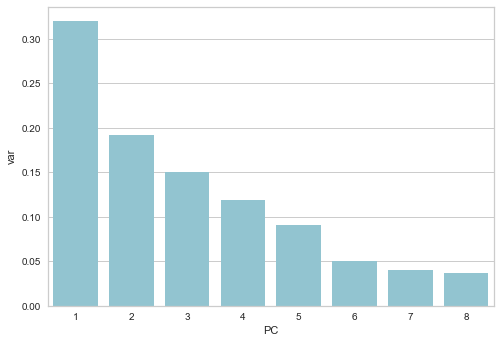

<Figure size 576x396 with 0 Axes>

In [80]:
pca_comparison(X, 8)

In [81]:
pca = PCA(n_components=4)
components = pca.fit_transform(X)
print(components.shape)
#components.append(np.zeros(components.shape[0]))
#components = np.append(components, np.zeros(components.shape[0]).T)
z_comp = np.zeros(components.shape[0])
print(components.shape)
pdf = pd.DataFrame(data = components, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
#print(pdf)

pdy = pd.DataFrame(data=y, columns=["Outcome"])
#print(pdy)
finalDf = pd.concat([pdf, pdy], axis = 1) #NM
finalDf2 = pd.concat([pdf.reset_index(drop=True), pdy.reset_index(drop=True)], axis=1)
print(finalDf)

finalDf2["pc 0"] = 0
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
print(finalDf2)


(394, 4)
(394, 4)
         pc 1      pc 2      pc 3      pc 4  Outcome
0   -2.017676  0.089506 -0.354215 -0.708399        0
1    0.663620  2.336581  2.464177  4.603630        1
2   -1.693198  0.155854 -0.503921  0.190872        1
3    3.265034 -0.340505  2.147403 -1.939627        1
4    3.256839 -1.002718  4.627136 -2.086345        1
..        ...       ...       ...       ...      ...
389  2.749051  2.105841  1.195267 -2.522731        1
390  1.179956  0.940757 -0.537070  1.084926        1
391 -1.961858  0.272329 -0.122495  1.212087        0
392  2.453078 -2.050123 -1.975359  0.246744        0
393 -0.661289 -1.147695 -0.195675 -0.547078        0

[394 rows x 5 columns]
         pc 1      pc 2      pc 3      pc 4  Outcome  pc 0
0   -2.017676  0.089506 -0.354215 -0.708399        0     0
1    0.663620  2.336581  2.464177  4.603630        1     0
2   -1.693198  0.155854 -0.503921  0.190872        1     0
3    3.265034 -0.340505  2.147403 -1.939627        1     0
4    3.256839 -1.002718  4.

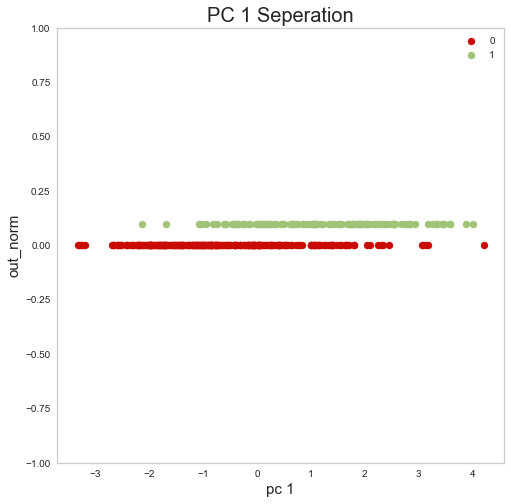

In [82]:

finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('out_norm', fontsize = 15)
ax.set_title('PC 1 Seperation', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'out_norm']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_ylim(-1, 1)
ax.grid()
#plt.clf()


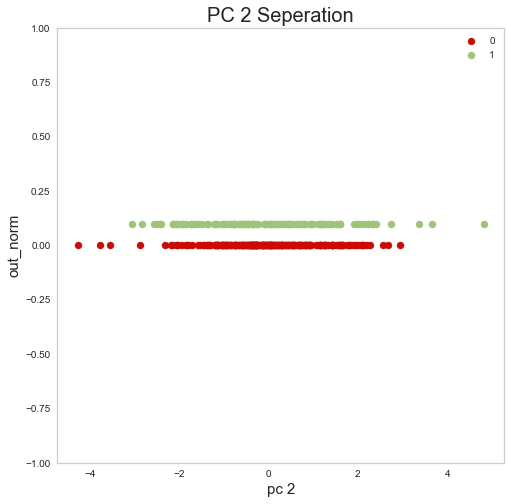

In [83]:

finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 2', fontsize = 15)
ax.set_ylabel('out_norm', fontsize = 15)
ax.set_title('PC 2 Seperation', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 2']
               , finalDf2.loc[points_in_label, 'out_norm']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_ylim(-1, 1)
ax.grid()
#plt.clf()

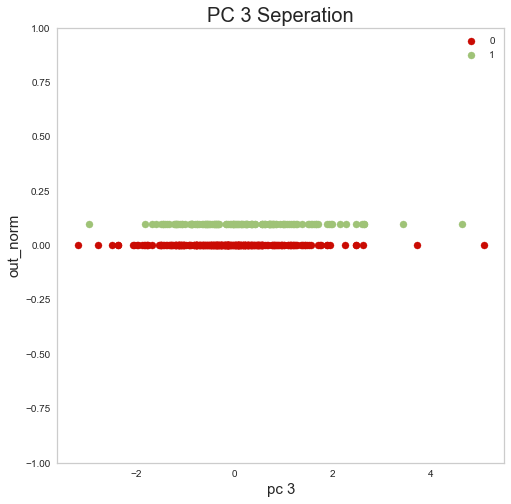

In [84]:

finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 3', fontsize = 15)
ax.set_ylabel('out_norm', fontsize = 15)
ax.set_title('PC 3 Seperation', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 3']
               , finalDf2.loc[points_in_label, 'out_norm']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_ylim(-1, 1)
ax.grid()
#plt.clf()

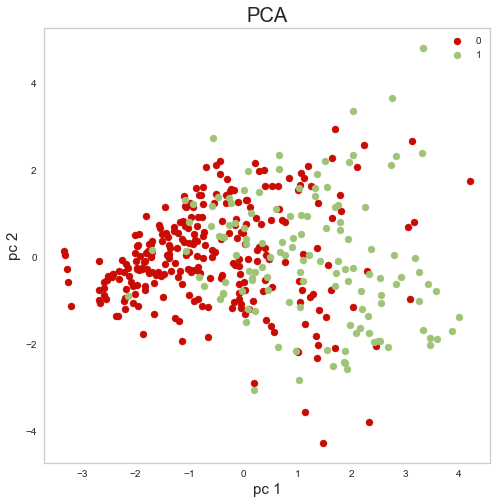

In [86]:
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()


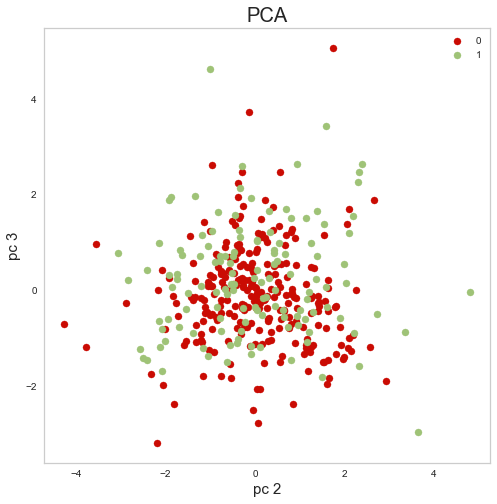

In [87]:
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 2', fontsize = 15)
ax.set_ylabel('pc 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 2']
               , finalDf2.loc[points_in_label, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()


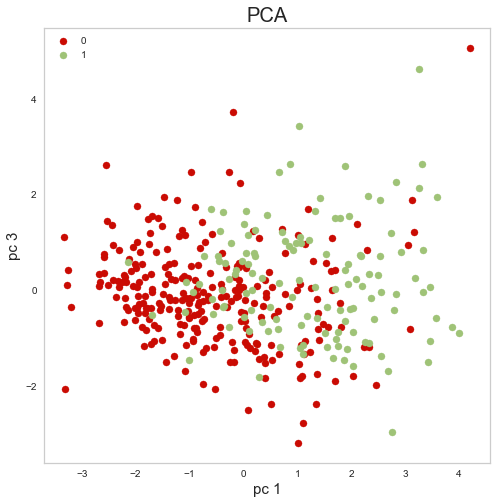

In [88]:
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()

In [89]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


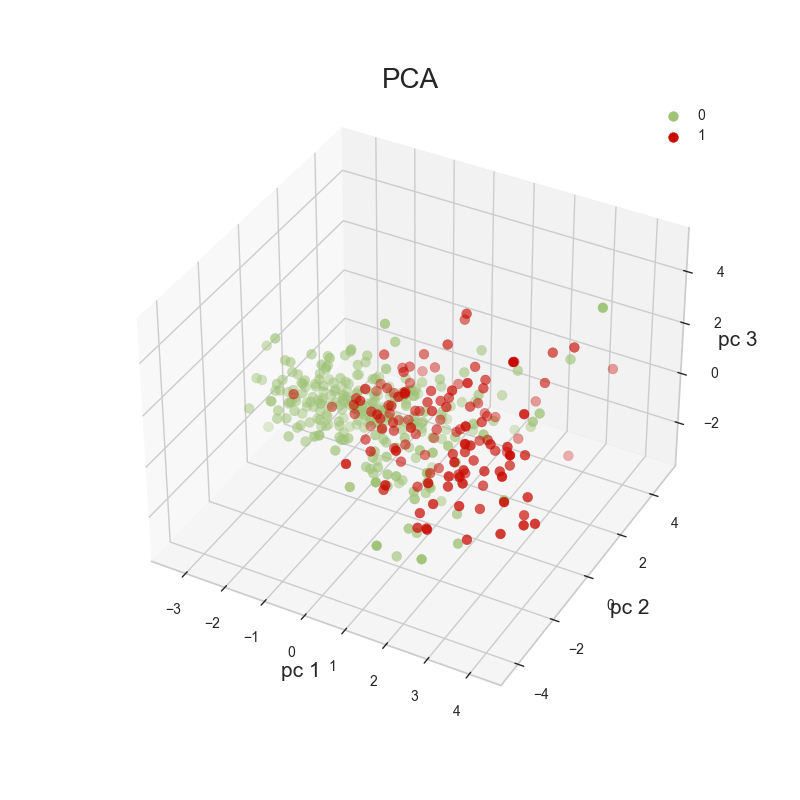

In [91]:
%matplotlib notebook
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 2', fontsize = 15)
ax.set_zlabel('pc 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'pc 2']
               , finalDf2.loc[points_in_label, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()

In [92]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.31985745 0.19137096]
[31.75201875 24.56015619]


In [93]:
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.31985745 0.19137096]
[31.75201875 24.56015619]


# ICA

In [118]:
from sklearn.decomposition import FastICA


def analyze_ica(X, n_comps):
    columns_na = []
    for i in range(1, n_comps + 1):
        columns_na.append("ic " + str(i))
    transformer = FastICA(n_components=n_comps, random_state=0)
    X_transformed = transformer.fit_transform(X)
    X_transformed.shape
    pdf = pd.DataFrame(data = X_transformed, columns = columns_na)
    pdy = pd.DataFrame(data=y, columns=['labels'])
    icaDf = pd.concat([pdf, pdy], axis = 1)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('ic 1', fontsize = 15)
    ax.set_ylabel('ic 2', fontsize = 15)
    ax.set_title('ICA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        points_in_label = icaDf['labels'] == target
        ax.scatter(icaDf.loc[points_in_label, 'ic 1']
                   , icaDf.loc[points_in_label, 'ic 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('ic 1', fontsize = 15)
    ax.set_ylabel('ic 2', fontsize = 15)
    ax.set_zlabel('ic 3', fontsize = 15)
    ax.set_title('ICA', fontsize = 20)
    targets = [0, 1]
    colors = ['g', 'r']
    for target, color in zip(targets,colors):
        points_in_label = icaDf['labels'] == target
        ax.scatter(icaDf.loc[points_in_label, 'ic 1']
                   , icaDf.loc[points_in_label, 'ic 2']
                   , icaDf.loc[points_in_label, 'ic 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    #ax.set_ylim(-1, 1)
    ax.grid()
    
    return icaDf

<IPython.core.display.Javascript object>


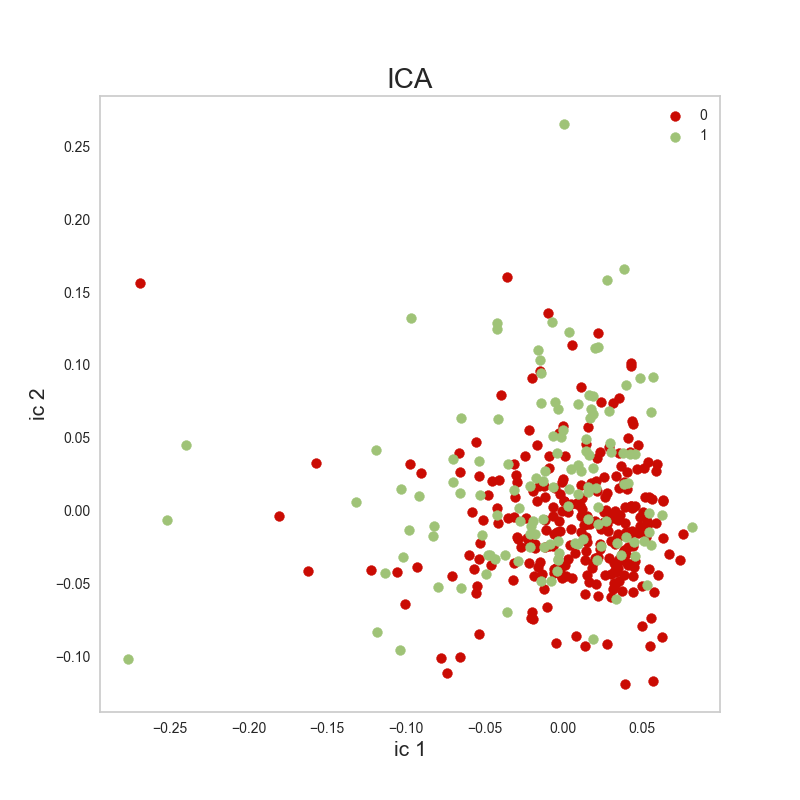

<IPython.core.display.Javascript object>


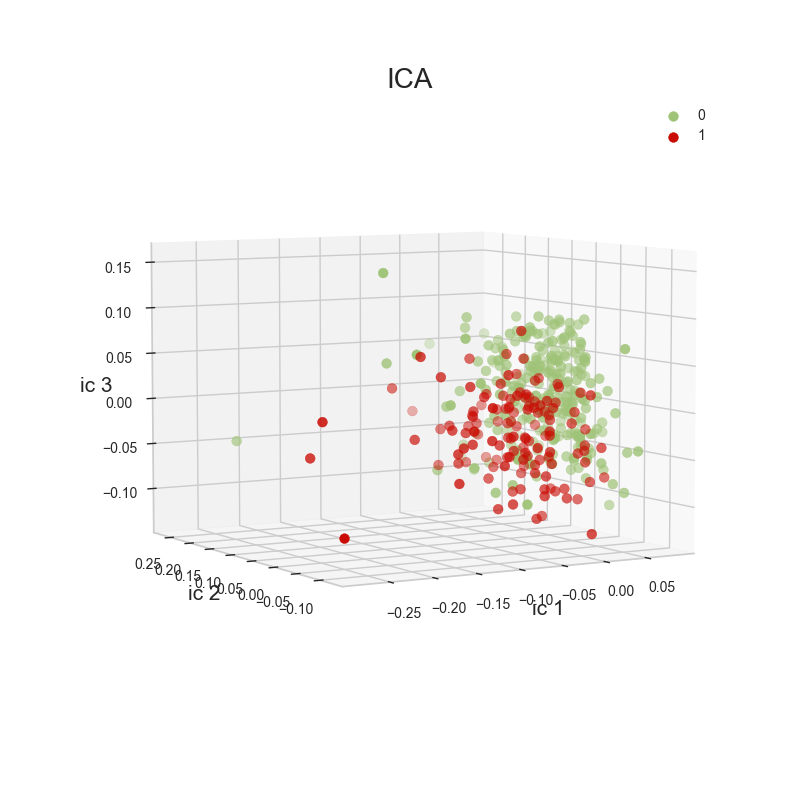

In [119]:
icaDf = analyze_ica(X, 5)

# Random Projection

In [138]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from collections import defaultdict
from itertools import product
from sklearn.metrics.pairwise import pairwise_distances
import scipy.sparse as sps
from scipy.linalg import pinv

In [144]:
def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

def reconstructionError(projections,X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p@W)@(X.T)).T # Unproject projected data
    errors = np.square(X-reconstructed)
    return np.nanmean(errors)

def run_SparseRandomProjection(X,y,title):
    dims = list(np.arange(2,(X.shape[1]-1),3))
    #dims = list(np.arange(2,80,3))
    dims.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dims):
        #print(i)
        rp = SparseRandomProjection(random_state=i, n_components=dim)
        tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
    print(tmp)
    tmp = pd.DataFrame(tmp).T
    print(tmp)
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'b-')
    ax1.set_xlabel('Random Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, 'm-')
    ax2.set_ylabel('STD Reconstruction Correlation', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("Random Components for 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()
    

defaultdict(<class 'dict'>, {2: {0: 0.5393658517662105, 1: 0.6251431189656859, 2: 0.4684405666337479, 3: 0.7085845893051403, 4: 0.6704147948464763}, 5: {0: 0.8042036276633273, 1: 0.8188467202377282, 2: 0.8324027762567392, 3: 0.8647767845869959, 4: 0.7583140292260359}, 8: {0: 0.8095755907648594, 1: 0.8908880386176921, 2: 0.8479008295743858, 3: 0.8402249575647873, 4: 0.8955679737117169}})
          0         1         2         3         4
2  0.539366  0.625143  0.468441  0.708585  0.670415
5  0.804204  0.818847  0.832403  0.864777  0.758314
8  0.809576  0.890888  0.847901  0.840225  0.895568


<IPython.core.display.Javascript object>


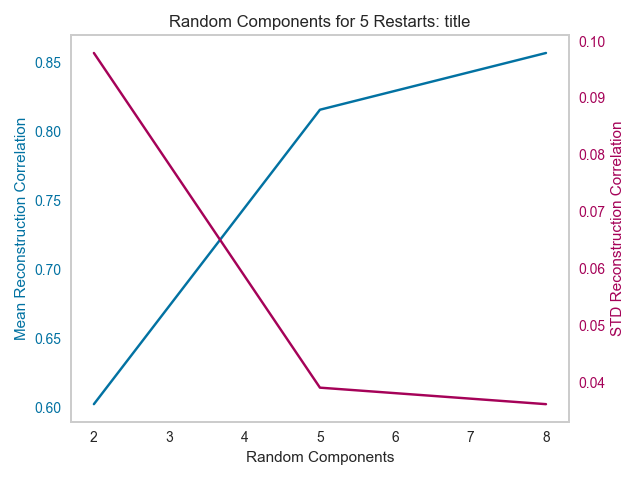

In [145]:
run_SparseRandomProjection(X, y, "title")

In [140]:
clusters =  [2,5,10,15,20,25,30,35,40]
dims = [1, 2, 3, 4, 5, 6, 7]
#raise
#%% data for 1

tmp = defaultdict(dict)
for i,dim in product(range(10),dims):
    rp = SparseRandomProjection(random_state=i, n_components=dim)
    tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
tmp =pd.DataFrame(tmp).T
tmp.to_csv('saved_results/diab_scree_pwd.csv')

c:\users\fuers\anaconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [141]:
tmp = defaultdict(dict)
for dim in dims:
    rp = SparseRandomProjection(n_components=dim)
    rp.fit(X)
    re_x = reconstructionError(rp, X)
tmp =pd.DataFrame(tmp).T
tmp.to_csv('saved_results/diab_scree_recerr.csv')

In [61]:
pdf = pd.DataFrame(data = components
             , columns = col_vals)
pdy = pd.DataFrame(data=y, columns=["labels"])
finalDf = pd.concat([pdf, pdy], axis = 1)
variance_ratio = pd.DataFrame({'var':transformer.explained_variance_ratio_,
             'PC':col_vals})
sns.barplot(x='PC',y="var", data=variance_ratio, color="c");
plt.show()
plt.clf()

AttributeError: 'GaussianRandomProjection' object has no attribute 'explained_variance_ratio_'

# Decision tree

# SVM

# ADABOOST

# CNN